[2, 1, 6, 5, 5, 3, 2, 2, 7, 2, 1, 1, 2, 2, 2, 2, 1, 2, 7, 3, 1, 1, 1, 2, 5, 6, 1, 2, 1, 5, 1, 2, 2, 1, 1, 1, 6, 2, 1, 1, 2, 3, 2, 2, 6, 3, 2, 7, 1, 1, 3, 1, 2, 2, 1, 3, 7, 2, 1, 3, 1, 7, 1, 2, 2]


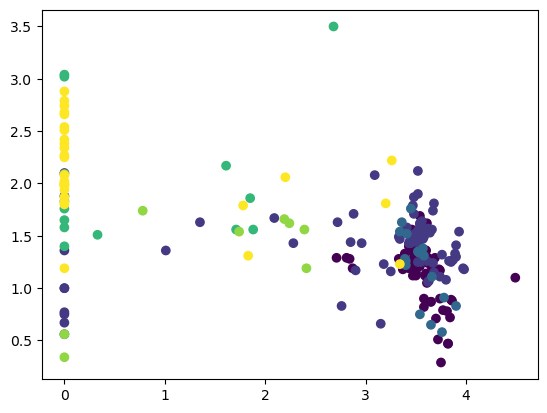

Accuracy Score is : 0.6307692307692307


In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df= pd.read_csv('glass.csv')
df.head()

def ec(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

from collections import Counter
class KNN:
    def __init__(self, k=3): 
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        predictions=[self._predict(x) for x in X]
        return predictions
    def _predict(self, x):
        distances=[ec(x1=x, x2=x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]

        co = Counter(k_labels).most_common()
        return co[0][0]

X = df.drop('Type', axis=1).values
y = df['Type'].values
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)
clf=KNN(k=3)
clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)
print(predictions)

plt.scatter(X[:,2], X[:,3], c=y)
plt.show()

a1 = accuracy_score(y_pred=predictions,y_true=Y_test)
print(f"Accuracy Score is : {a1}")

[2, 1, 6, 5, 5, 3, 2, 2, 7, 2, 1, 1, 2, 2, 2, 2, 1, 2, 7, 2, 1, 1, 1, 2, 5, 6, 1, 2, 1, 5, 1, 2, 6, 1, 1, 1, 6, 2, 1, 1, 2, 1, 2, 2, 6, 1, 2, 7, 1, 2, 3, 1, 2, 2, 1, 3, 7, 3, 1, 3, 1, 7, 1, 2, 1]


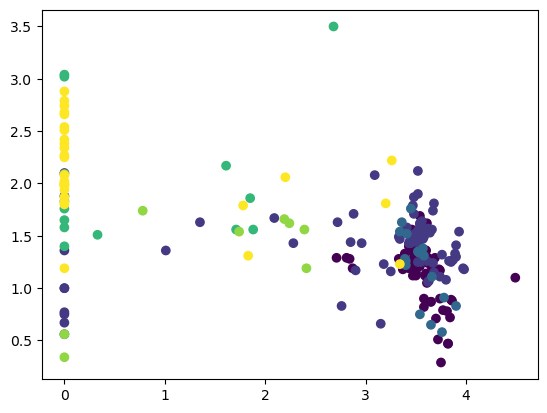

Accuracy score is : 0.6307692307692307


In [2]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df= pd.read_csv('glass.csv')
df.head()

def mc(x1, x2):
    return np.sum(np.abs(x1-x2))
    
from collections import Counter
class KNN:
    def __init__(self, k=3): 
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        predictions=[self._predict(x) for x in X]
        return predictions
    def _predict(self, x):
        distances=[mc(x1=x, x2=x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]

        co = Counter(k_labels).most_common()
        return co[0][0]

X = df.drop('Type', axis=1).values
y = df['Type'].values
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)
clf2=KNN(k=3)
clf2.fit(X_train,Y_train)
predictions=clf2.predict(X_test)
print(predictions)

plt.scatter(X[:,2], X[:,3], c=y)
plt.show()

a2 = accuracy_score(y_pred=predictions,y_true=Y_test)
print(f"Accuracy score is : {a2}")

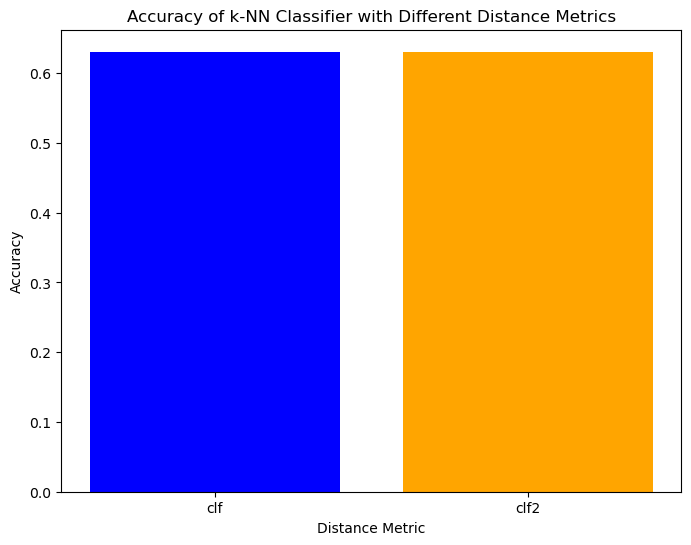

In [3]:
metrics = ['clf', 'clf2']
accuracies = [a1, a2]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, accuracies, color=['blue', 'orange'])
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN Classifier with Different Distance Metrics')

# Show the plot
plt.show()